### The intention of this project is to try and classify the PM2.5 concentration in air into two categories namely - 1) Hazardous and 2) Non hazardous by making use of some meteorological factors and some pollutatnts present in the air. Some standard machine learning algorithms will be deployed to tackle this problem.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel(r"D:\DATA_PROJECT.xlsx",usecols = 'D:L')
data = data.drop(['PM10'], axis = 1)
data.head()

,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
0,JAN,0,311,138,93,13,4,82
1,JAN,6,327,154,90,10,9,87
2,JAN,9,331,153,69,15,13,72
3,JAN,16,334,148,45,23,13,47
4,JAN,20,337,144,61,18,2,59


In [4]:
## Detection of outlier in the temperature column:
min_threshold = 9
max_threshold = 42
data[(data['TEMPERATURE']>= max_threshold) | (data['TEMPERATURE'] < min_threshold)]

,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
73,JAN,6,386,150,105,2,2,82
1587,DEC,0,295,69,182,140,0,88


#####  These two values are clearly outliers since temperature in Kolkata has never dipped below 9 degree Celsius in the past and 140 degree Celsius in Winter is clearly an error. Hence these values will be removed.
 

In [5]:
data = data[(data['TEMPERATURE']<max_threshold) & (data['TEMPERATURE']>= min_threshold)]
data.shape

(1627, 8)

In [6]:
## Value of humidity should range between 0-100 (in percentage) and any value beyond that will be an outlier:
data[(data['HUMIDITY']>100) | (data['HUMIDITY']<0)]


,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY


In [7]:
## Value of wind speed (km/hr) should not be less than zero:
data[(data['WIND SPEED']<0)]

,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY


In [8]:
data[data['PM'] > data['PM'].quantile(0.99)]
## These values of PM 2.5 concentration do not seem to be odd since PM2.5 concentration has soared high during winter in Kolkata, suggests reliable records


,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
69,JAN,16,390,162,64,24,13,44
70,JAN,20,397,161,74,16,4,77
71,JAN,21,403,160,81,16,2,77
72,JAN,0,406,155,106,15,2,82
81,JAN,16,390,158,79,24,6,50
82,JAN,20,406,166,85,20,2,64
83,JAN,21,408,165,92,19,2,68
84,JAN,0,411,165,118,17,2,82
85,JAN,6,404,175,116,14,11,82
86,JAN,9,401,172,94,18,11,64


In [9]:
data[data['NO2'] > data['NO2'].quantile(0.99)]
## Again, non of these values seem to be unreasonably high and hence will not be removed.

,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
105,JAN,16,325,180,68,25,9,39
106,JAN,20,339,182,68,19,2,68
107,JAN,21,340,184,152,18,2,73
108,JAN,0,348,191,168,15,2,82
109,JAN,6,372,196,135,12,3,88
110,JAN,9,374,197,106,17,11,77
111,JAN,16,372,180,57,24,9,38
112,JAN,20,370,177,55,17,2,63
127,JAN,6,328,178,153,12,2,94
128,JAN,9,386,177,139,18,2,77


In [10]:
data[data['CO'] > data['CO'].quantile(0.99)]

,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
66,JAN,0,341,155,155,13,2,88
78,JAN,0,344,138,159,15,2,82
107,JAN,21,340,184,152,18,2,73
108,JAN,0,348,191,168,15,2,82
126,JAN,0,373,172,172,15,2,82
127,JAN,6,328,178,153,12,2,94
132,JAN,0,414,216,166,18,2,73
1343,NOV,0,57,56,158,23,2,94
1436,NOV,21,185,108,154,23,0,83
1437,NOV,0,198,114,162,20,0,100


In [11]:
### Lastly we will check and see if any value in the columns of PM2.5, CO and NO2 is negative since that is below the acceptable range.
data[data['PM'] < 0 ]

,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY


In [12]:
data[data['CO'] < 0 ]

,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY


In [13]:
data[data['NO2'] < 0 ]

,MONTH,HOUR,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY


In [14]:
data = data.drop(['MONTH','HOUR'], axis = 1)
data.head()

,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
0,311,138,93,13,4,82
1,327,154,90,10,9,87
2,331,153,69,15,13,72
3,334,148,45,23,13,47
4,337,144,61,18,2,59


In [15]:
## Look for missing values
data.isnull().sum()

PM             0
NO2            0
CO             0
TEMPERATURE    0
WIND SPEED     0
HUMIDITY       0
dtype: int64

In [16]:
corr_matrix1 = data.corr()
corr_matrix1

,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
PM,1.000000,0.866001,0.578549,-0.668970,-0.458735,-0.311263
NO2,0.866001,1.000000,0.474530,-0.621023,-0.513662,-0.381453
CO,0.578549,0.474530,1.000000,-0.602729,-0.492121,0.214864
TEMPERATURE,-0.668970,-0.621023,-0.602729,1.000000,0.512699,-0.171220
WIND SPEED,-0.458735,-0.513662,-0.492121,0.512699,1.000000,-0.054458
HUMIDITY,-0.311263,-0.381453,0.214864,-0.171220,-0.054458,1.000000


In [17]:
## setting up of mask to hide the upper traingle:

mask = np.zeros_like(corr_matrix1, dtype = np.bool )
mask[np.triu_indices_from(mask)]  = True

## This mask will be used to generate the heatmap

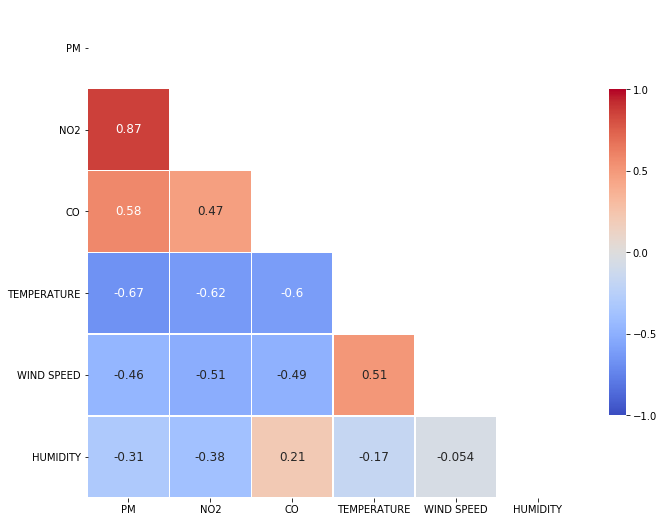

In [18]:
## creation of the heatmap:

fig , ax = plt.subplots(figsize = (11,15))

heatmap = sns.heatmap(corr_matrix1 , mask = mask, square = True, linewidths = 0.5, cmap = 'coolwarm',
                     cbar_kws = {'shrink': 0.4, 'ticks':[-1, -0.5, 0, 0.5, 1]},
                     vmin = -1, vmax = 1, annot = True, annot_kws = {'size':12})

ax.set_yticklabels(corr_matrix1.columns , rotation = 0)
ax.set_xticklabels(corr_matrix1.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left':True})


In [19]:
heatmap.get_figure().savefig('heatmap.png', dpi = 400)

#### Now we will use variance inflation factor to test the presence of multicollinearity among the independent features i.e NO2, CO, Temperature, Wind Speed and Humidity which will be used for classification of PM2.5 concentration in the air as hazardous or not

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['NO2','CO','TEMPERATURE','WIND SPEED','HUMIDITY']]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data


,features,VIF
0,NO2,4.071770
1,CO,10.584828
2,TEMPERATURE,15.471887
3,WIND SPEED,4.315637
4,HUMIDITY,20.716561


In [21]:
X = data[['NO2','CO','TEMPERATURE','WIND SPEED']]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data


,features,VIF
0,NO2,3.960355
1,CO,6.040274
2,TEMPERATURE,8.504572
3,WIND SPEED,4.283653


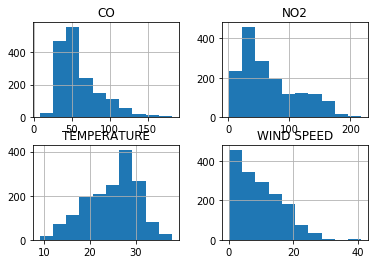

In [22]:
## Check the histograms of the independent variables in order to form a rough idea about their underlying distributions
X.hist()
plt.show()

In [23]:
data1 = data.copy()
data1.head()

,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
0,311,138,93,13,4,82
1,327,154,90,10,9,87
2,331,153,69,15,13,72
3,334,148,45,23,13,47
4,337,144,61,18,2,59


In [24]:
## Transform the PM column in the data set to zero or one. Value above 60 is classified as 1 (polluted)
data1.PM = np.where(data1.PM >= 60, 1, 0)
data1.head()




,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
0,1,138,93,13,4,82
1,1,154,90,10,9,87
2,1,153,69,15,13,72
3,1,148,45,23,13,47
4,1,144,61,18,2,59


In [25]:
data1[data1.PM == 0]

,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
340,0,78,48,19,11,94
341,0,77,47,19,9,94
342,0,72,45,19,7,94
343,0,70,36,17,3,94
344,0,67,32,21,11,83
...,...,...,...,...,...,...
1339,0,38,43,24,11,94
1340,0,37,47,29,11,70
1341,0,44,66,26,0,84
1342,0,46,75,25,0,89


In [26]:
## We have seen earlier that dropping the feature 'Humidity' has lead to the reduction in the VIF of the other features.
## We will now drop this feature and use logistic regression to classify the air quality:
data1 = data1.drop(['HUMIDITY'], axis = 1)
data1.head()

,PM,NO2,CO,TEMPERATURE,WIND SPEED
0,1,138,93,13,4
1,1,154,90,10,9
2,1,153,69,15,13
3,1,148,45,23,13
4,1,144,61,18,2


In [27]:
x = data1.iloc[:, 1:]
y = data1.iloc[:,0]


In [28]:
## We will make use of minmax scaler to scale the independent variables since they have different scales of measurement.
## let us first split our data into train and test set:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 30)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# We fit the scaler to the train data and learn the parameters:
scaler.fit(x_train)
# let's transform the train and test data now:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [31]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)
## Now we will apply logistic regression to predict the concentration of PM2.5:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [32]:
clf.fit(x_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = clf.predict(x_test_scaled)
y_true = y_test

In [34]:
clf.score(x_test_scaled, y_test)

0.8711656441717791

In [35]:
## Diagnostics:
from sklearn.metrics import accuracy_score

In [36]:
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(x_train_scaled)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))


Train accuracy: 0.85
Test accuracy: 0.87



Test confusion_matrix


Text(69.0, 0.5, 'True Value')

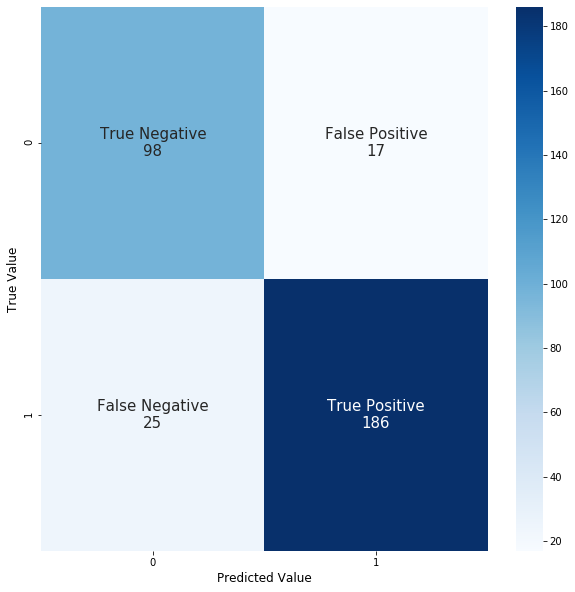

In [37]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix( y_true,y_pred)
print("\nTest confusion_matrix")

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

fig , ax = plt.subplots(figsize = (10,10))

heatmap1 = sns.heatmap(cf_matrix,annot = labels , cmap='Blues',fmt = '',annot_kws = {'size':15})
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('True Value', fontsize=12)

In [38]:
heatmap1.get_figure().savefig('heatmap1.png', dpi = 400)

##### Another technique that we will use to deal with the problem of multicollinearity is the technique of Principal Component Analysis

In [39]:
data2 = data.copy()
data2.PM = np.where(data2.PM >= 60, 1, 0)
data2.head()

,PM,NO2,CO,TEMPERATURE,WIND SPEED,HUMIDITY
0,1,138,93,13,4,82
1,1,154,90,10,9,87
2,1,153,69,15,13,72
3,1,148,45,23,13,47
4,1,144,61,18,2,59


In [40]:
x2  = data2.iloc[:,1:]
y2 = data2.iloc[:,0]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.2, random_state = 30)

In [41]:
## At first we will apply feature scaling:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
## Fit on the train data set:
sc.fit(x2_train)
x2_train_scaled = sc.transform(x2_train)
x2_test_scaled = sc.transform(x2_test)

x2_train_scaled = pd.DataFrame(x2_train_scaled,columns = x2_train.columns)
x2_test_scaled = pd.DataFrame(x2_test_scaled,columns = x2_test.columns)

Eigenvalues:
[2.62514934 1.26509886 0.52659797 0.40676175 0.18023824]

Variances(Percentage):
[52.46263089 25.28252906 10.52386411  8.12898196  3.60199397]



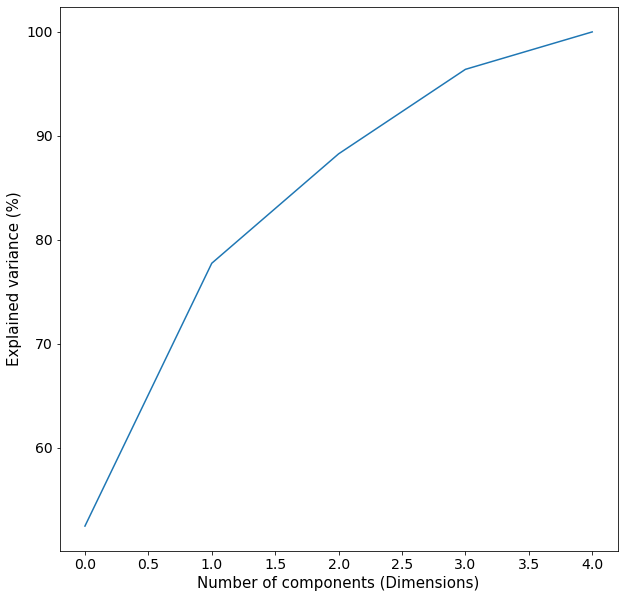

In [42]:
## Now we will go ahead and apply PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
pca.fit(x2_train_scaled)

## let's print the eigenvalues:
print("Eigenvalues:")
print(pca.explained_variance_)
print()

## let's print the explained variances:
print("Variances(Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

## Make the scree plot:
fig , ax = plt.subplots(figsize = (10,10))



screeplot= plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)", fontsize = 15)
plt.ylabel("Explained variance (%)", fontsize = 15)
plt.xticks(fontsize =14)
plt.yticks(fontsize = 14)

## saving the figure:
plt.savefig('screeplot.png', dpi = 400)


#### We can see from the scree plot that the first three principal components together explain about 88.26% of the total variability. We will use these first three principal components. 

In [43]:
## Let's do the feature scaling again:
x2_train_scaled = sc.transform(x2_train)
x2_train_scaled = pd.DataFrame(x2_train_scaled,columns = x2_train.columns)

## Apply PCA:
pca1 = PCA(n_components = 3)
pca1.fit(x2_train_scaled)
x2_train_pca = pca1.transform(x2_train_scaled)
x2_test_pca = pca1.transform(x2_test_scaled)

## Let us get the transformed train and test set:
x2_train_pca = pd.DataFrame(x2_train_pca)
x2_test_pca = pd.DataFrame(x2_test_pca)
print(x2_train_pca.head())

          0         1         2
0 -0.092486  1.182831 -0.118957
1  1.731352 -1.376097 -0.051106
2  1.478141 -0.705436 -0.626678
3  1.917787 -0.935139 -0.207215
4 -1.849051 -0.835446 -0.096278


#### We will now go ahead and apply logistic regression on these 3 principal components to classify the level of PM2.5

In [44]:
clf.fit(x2_train_pca,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y2_pred = clf.predict(x2_test_pca)
y2_true = y2_test

clf.score(x2_test_pca, y2_test)

0.8957055214723927


Test confusion_matrix


Text(69.0, 0.5, 'True Value')

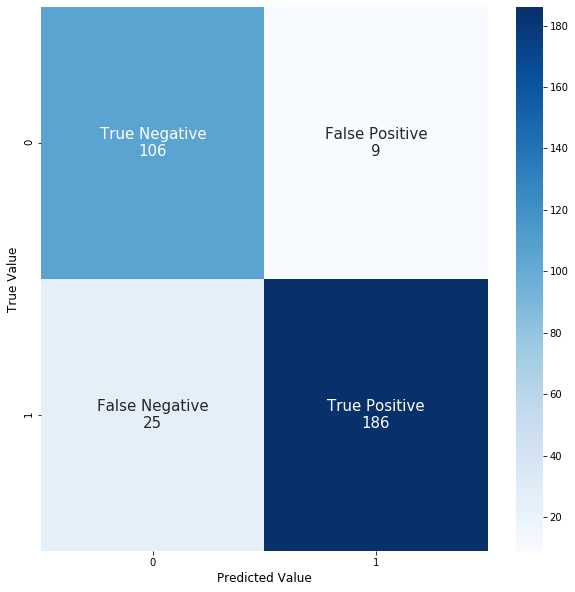

In [46]:
cf2_matrix = confusion_matrix( y2_true,y2_pred)
print("\nTest confusion_matrix")

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf2_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

fig , ax = plt.subplots(figsize = (10,10))




heatmap2 = sns.heatmap(cf2_matrix,annot = labels , cmap='Blues',fmt = '',annot_kws = {'size':15})
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('True Value', fontsize=12)

In [47]:
heatmap2.get_figure().savefig('heatmap2.png', dpi = 400)

#### We will now use Gaussian Naive Bayes classifier to predict the concentration of PM2.5. We will check if our data is imbalanced and then apply the classifier on the principal components since the presence of multicollinearity in the data violates our naive assumption that the features are statistically independent.

In [48]:
print(y2_train[y2_train == 0].count())
print(y2_train[y2_train == 1].count())
print(y2_train.count())

460
841
1301


#### The imbalance ratio is roughly 4:6 and we may conclude that there is a slight imbalance in our data. But, since it is mild, we will move forward with our analysis

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x2_train_pca,y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
y_gnb_pred = gnb.predict(x2_test_pca)
y_gnb_true = y2_test

gnb.score(x2_test_pca, y2_test)

0.8619631901840491


Test confusion_matrix


Text(69.0, 0.5, 'True Value')

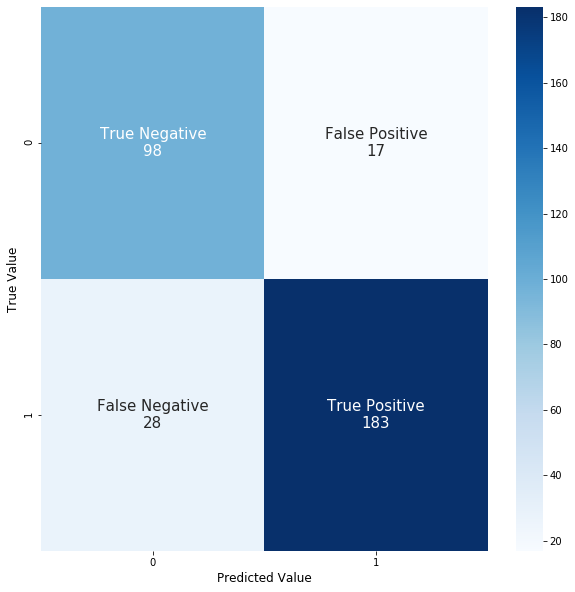

In [51]:
cf3_matrix = confusion_matrix( y_gnb_true,y_gnb_pred)
print("\nTest confusion_matrix")

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf3_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

fig , ax = plt.subplots(figsize = (10,10))





heatmap3 = sns.heatmap(cf3_matrix,annot = labels , cmap='Blues',fmt = '',annot_kws = {'size':15})
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('True Value', fontsize=12)

In [52]:
heatmap3.get_figure().savefig('heatmap3.png', dpi = 400)

#### We will now use a K nearest neighbors algorithm which is a non parametric approach to classify the quality of air. One assumption that we will make for running this algorithm is that the data appear in a cluster.
#### Also we will apply this algorithm on our normalized data since it is using Euclidean distance which gets affected my the range of the data. We are using Min-Max scaler here, because for KNN, we do not make any assumptions regarding the distribution of the data. 

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [55]:
y_knn_pred = knn.predict(x_test_scaled)
y_knn_true = y_test

In [56]:
knn.score(x_test_scaled, y_test)

0.901840490797546

#### Although we have a high score here, we will have to device some means to find the optimum value of 'k' for our analysis. We will use the elbow method for this purpose.

In [57]:
accuracy_rate = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled, y_train)
    score = knn.score(x_test_scaled, y_test)
    accuracy_rate.append(score)
    

In [58]:
accuracy_rate

[0.901840490797546,
 0.8926380368098159,
 0.901840490797546,
 0.8987730061349694,
 0.9079754601226994,
 0.8926380368098159,
 0.8957055214723927,
 0.9049079754601227,
 0.911042944785276,
 0.9079754601226994,
 0.9079754601226994,
 0.911042944785276,
 0.9141104294478528,
 0.9079754601226994,
 0.9079754601226994,
 0.901840490797546,
 0.9079754601226994,
 0.9049079754601227,
 0.9049079754601227,
 0.9049079754601227,
 0.9079754601226994,
 0.901840490797546,
 0.9049079754601227,
 0.8957055214723927,
 0.8957055214723927,
 0.8957055214723927,
 0.901840490797546,
 0.8987730061349694,
 0.901840490797546,
 0.8926380368098159,
 0.8957055214723927,
 0.8834355828220859,
 0.8834355828220859,
 0.8773006134969326,
 0.8834355828220859,
 0.8834355828220859,
 0.8834355828220859,
 0.8803680981595092,
 0.8834355828220859,
 0.8803680981595092]

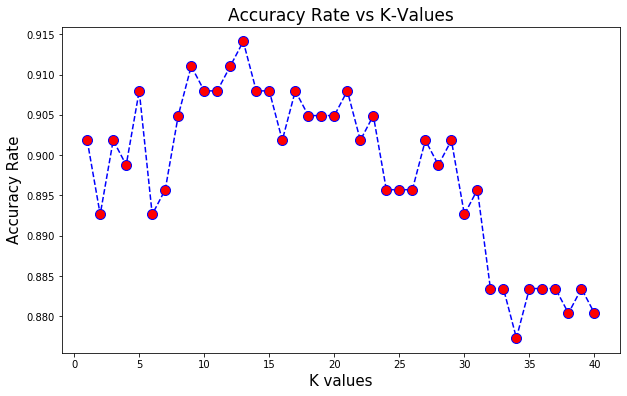

In [59]:






plt.figure(figsize = (10,6))
plt.plot(range(1,41), accuracy_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Accuracy Rate vs K-Values", fontsize = 17)
plt.xlabel('K values', fontsize = 15)
plt.ylabel('Accuracy Rate', fontsize = 15)

plt.savefig('plot_knn.png', dpi = 400)

#### We can see that for a value of k around 12-13, the accuracy rate has has reached it's maximum height.

In [60]:
knn = KNeighborsClassifier(n_neighbors = 13)

knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [61]:
y_knn_pred = knn.predict(x_test_scaled)
y_knn_true = y_test

In [62]:
knn.score(x_test_scaled, y_test)

0.9141104294478528


Test confusion_matrix


Text(69.0, 0.5, 'True Value')

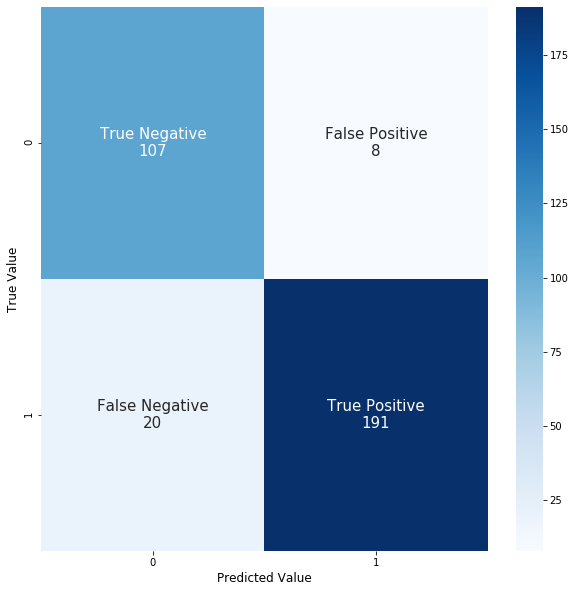

In [63]:
### We will finally make the confusion matrix:

cf4_matrix = confusion_matrix( y_knn_true,y_knn_pred)
print("\nTest confusion_matrix")

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf4_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

fig , ax = plt.subplots(figsize = (10,10))




heatmap4 = sns.heatmap(cf4_matrix,annot = labels , cmap='Blues',fmt = '',annot_kws = {'size':15})
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('True Value', fontsize=12)


In [64]:
heatmap4.get_figure().savefig('heatmap4.png', dpi = 400)

#### Finally we will use Support Vector Machines to classify the air quality

In [65]:
from sklearn import svm 

In [66]:
clf_svm = svm.SVC(kernel = "linear") ## Makes an untrained shell of a SVC
clf_svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
clf_svm.fit(x_train_scaled, y_train)

y_svm_pred = clf_svm.predict(x_test_scaled)
y_svm_true = y_test

In [68]:
 clf_svm.score(x_test_scaled, y_test)

0.8803680981595092

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100] , 'kernel':['rbf','poly','linear'], 'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(svm.SVC(), param_grid)
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
print(grid.best_params_)
print(grid.score(x_test_scaled, y_test))

{'C': 100, 'degree': 1, 'kernel': 'rbf'}
0.9202453987730062


In [71]:
clf_svm1 = svm.SVC(kernel = "rbf", C  = 100, degree = 1)

In [72]:
clf_svm1.fit(x_train_scaled, y_train)

y_svm_pred = clf_svm1.predict(x_test_scaled)
y_svm_true = y_test

In [73]:
clf_svm1.score(x_test_scaled, y_test)

0.9202453987730062


Test confusion_matrix


Text(69.0, 0.5, 'True Value')

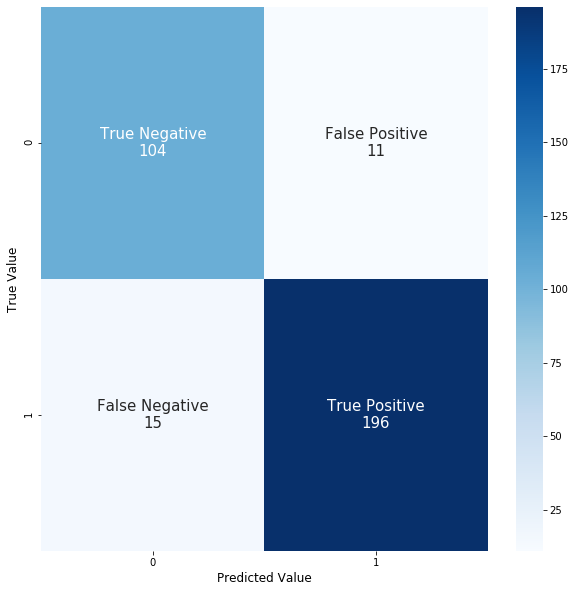

In [74]:
cf5_matrix = confusion_matrix( y_svm_true,y_svm_pred)
print("\nTest confusion_matrix")

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf5_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

fig , ax = plt.subplots(figsize = (10,10))





heatmap5 = sns.heatmap(cf5_matrix,annot = labels , cmap='Blues',fmt = '', annot_kws = {'size':15})
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('True Value', fontsize=12)

In [75]:
heatmap5.get_figure().savefig('heatmap5.png', dpi = 400)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba4430ed48>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba4400e048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba442dd308>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba3bf0da48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba3befef88>],
 'means': []}

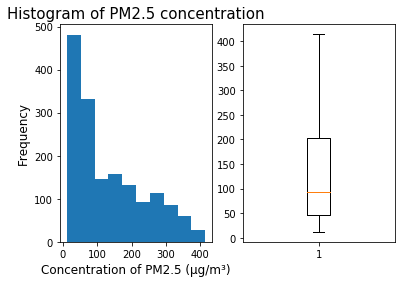

In [76]:
## These rough visualizations have been done for the time being which will be improved later.
plt.subplot(121)
plt.hist(data['PM'])
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel("Concentration of PM2.5 (\u03BCg/m\u00b3)",fontsize = 12)
plt.title('Histogram of PM2.5 concentration',fontsize = 15)
plt.subplot(122)
plt.boxplot(data['PM'])

#### Let us create box plots of the variables to detect the presence of an outlier

In [77]:
## Draw the boxplots of the predictors in a panel

In [78]:
for i in  range(5):
    print (i)

0
1
2
3
4


In [85]:
y2_train[y2_train == 0].count()

460

In [80]:
y2_train.count()

1301

In [81]:
y2_train[y2_train == 1].count()

841

In [82]:
print(' \u03BC')

 μ


In [83]:
y2_test.count()

326

In [84]:
y2_test[y2_test == 1].count()

211

In [86]:
y2_test[y2_test == 0].count()

115